In [1]:
import geopandas as gpd

In [2]:
# set the filepath and load in a shapefile
#fp = “datasets/geo-data/gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp”
fp = 'MEX_adm/MEX_adm1.shp'

map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,145,MEX,Mexico,1,Aguascalientes,Estado,State,None,None,"POLYGON ((-102.12611 21.73960, -102.13392 21.7..."
1,145,MEX,Mexico,2,Baja California Sur,Estado,State,None,None,"MULTIPOLYGON (((-114.75681 18.37097, -114.7568..."
2,145,MEX,Mexico,3,Baja California,Estado,State,None,None,"MULTIPOLYGON (((-114.23174 27.88559, -114.2308..."
3,145,MEX,Mexico,4,Campeche,Estado,State,None,None,"MULTIPOLYGON (((-91.79708 18.51764, -91.79708 ..."
4,145,MEX,Mexico,5,Chiapas,Estado,State,None,None,"MULTIPOLYGON (((-92.86236 15.16819, -92.86236 ..."


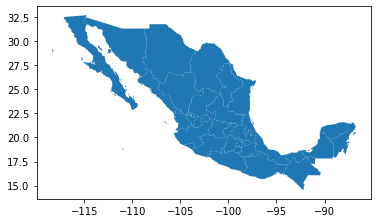

In [4]:
map_df.plot()

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from pywaffle import Waffle

df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [23]:
provincias_df = df.provincia.unique()
provincias_df

array(['Distrito Federal', 'Jalisco', 'Edo. de México', 'Oaxaca',
       'Quintana Roo', 'Colima', 'San luis Potosí', 'Nuevo León',
       'Querétaro', 'Tamaulipas', 'Puebla', 'Yucatán', 'Morelos',
       'Guerrero', 'Tabasco', 'Guanajuato', 'Hidalgo', 'Veracruz',
       'Chihuahua', 'Aguascalientes', 'Sonora', 'Michoacán',
       'Baja California Norte', 'Baja California Sur', 'Coahuila',
       'Durango', 'Sinaloa', 'Chiapas', 'Nayarit', 'Tlaxcala', 'Campeche',
       'Zacatecas', nan], dtype=object)

In [25]:
provincias_map_df = map_df.NAME_1.unique()
provincias_map_df

array(['Aguascalientes', 'Baja California Sur', 'Baja California',
       'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila', 'Colima',
       'Distrito Federal', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit',
       'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas'], dtype=object)

In [29]:
print('Provincias en data frame zona prop: '+str(len(provincias_df)))
print('Provincias en data frame mapa: '+str(len(provincias_map_df)))

Provincias en data frame zona prop: 33
Provincias en data frame mapa: 32


In [44]:
problemas = []
for item in provincias_map_df:
    isin = item in provincias_df
    print(item, isin)
    if not isin:
        problemas.append(item)

Aguascalientes True
Baja California Sur True
Baja California False
Campeche True
Chiapas True
Chihuahua True
Coahuila True
Colima True
Distrito Federal True
Durango True
Guanajuato True
Guerrero True
Hidalgo True
Jalisco True
México False
Michoacán True
Morelos True
Nayarit True
Nuevo León True
Oaxaca True
Puebla True
Querétaro True
Quintana Roo True
San Luis Potosí False
Sinaloa True
Sonora True
Tabasco True
Tamaulipas True
Tlaxcala True
Veracruz True
Yucatán True
Zacatecas True


In [45]:
problemas

['Baja California', 'México', 'San Luis Potosí']

In [46]:
for item in provincias_df:
    isin = item in provincias_map_df
    print(item, isin)
    if not isin:
        problemas.append(item)

Distrito Federal True
Jalisco True
Edo. de México False
Oaxaca True
Quintana Roo True
Colima True
San luis Potosí False
Nuevo León True
Querétaro True
Tamaulipas True
Puebla True
Yucatán True
Morelos True
Guerrero True
Tabasco True
Guanajuato True
Hidalgo True
Veracruz True
Chihuahua True
Aguascalientes True
Sonora True
Michoacán True
Baja California Norte False
Baja California Sur True
Coahuila True
Durango True
Sinaloa True
Chiapas True
Nayarit True
Tlaxcala True
Campeche True
Zacatecas True
nan False


In [47]:
problemas

['Baja California',
 'México',
 'San Luis Potosí',
 'Edo. de México',
 'San luis Potosí',
 'Baja California Norte',
 nan]

In [74]:
map_df.NAME_1 = map_df.NAME_1.replace({'Baja California': 'Baja California Norte', 'México': 'Edo. de México', 'San Luis Potosí':'San luis Potosí'})
map_df.NAME_1 

0            Aguascalientes
1       Baja California Sur
2     Baja California Norte
3                  Campeche
4                   Chiapas
5                 Chihuahua
6                  Coahuila
7                    Colima
8          Distrito Federal
9                   Durango
10               Guanajuato
11                 Guerrero
12                  Hidalgo
13                  Jalisco
14           Edo. de México
15                Michoacán
16                  Morelos
17                  Nayarit
18               Nuevo León
19                   Oaxaca
20                   Puebla
21                Querétaro
22             Quintana Roo
23          San luis Potosí
24                  Sinaloa
25                   Sonora
26                  Tabasco
27               Tamaulipas
28                 Tlaxcala
29                 Veracruz
30                  Yucatán
31                Zacatecas
Name: NAME_1, dtype: object

In [89]:
provinciaVScantidad = df.groupby('provincia').agg(cantidad_publicaciones = ('precio','count'))
#provinciaVScantidad
print(provinciaVScantidad.min())
print(provinciaVScantidad.max())


cantidad_publicaciones    94
dtype: int64
cantidad_publicaciones    58790
dtype: int64


In [85]:
merged = map_df.set_index('NAME_1').join(provinciaVScantidad)
merged.head()

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,cantidad_publicaciones
NAME_1,,,,,,,,,,
Aguascalientes,145,MEX,Mexico,1,Estado,State,None,None,"POLYGON ((-102.12611 21.73960, -102.13392 21.7...",1753
Baja California Sur,145,MEX,Mexico,2,Estado,State,None,None,"MULTIPOLYGON (((-114.75681 18.37097, -114.7568...",1700
Baja California Norte,145,MEX,Mexico,3,Estado,State,None,None,"MULTIPOLYGON (((-114.23174 27.88559, -114.2308...",3220
Campeche,145,MEX,Mexico,4,Estado,State,None,None,"MULTIPOLYGON (((-91.79708 18.51764, -91.79708 ...",263
Chiapas,145,MEX,Mexico,5,Estado,State,None,None,"MULTIPOLYGON (((-92.86236 15.16819, -92.86236 ...",1126


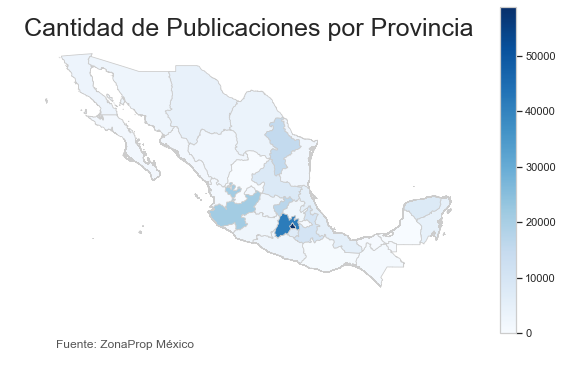

In [94]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'cantidad_publicaciones'
# set the range for the choropleth
vmin, vmax = 0, 58790
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Cantidad de Publicaciones por Provincia', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

fig.savefig('map_cant_publicaciones_por_provincia.png', dpi=300)
            

In [97]:
def precio_por_metros_totales(precio, metros):
        return precio/metros

df['precioXmetro'] = df.apply(lambda x: precio_por_metros_totales(x['precio'], x['metrostotales']), axis=1)
preciometroporprovincia = df.groupby('provincia').agg({'precioXmetro': 'mean'})

5968.995969444661
24011.411265524453


In [98]:
print(preciometroporprovincia.precioXmetro.min())
print(preciometroporprovincia.precioXmetro.max())

5968.995969444661
24011.411265524453


In [99]:
merged2 = map_df.set_index('NAME_1').join(preciometroporprovincia)
merged2.head()

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,precioXmetro
NAME_1,,,,,,,,,,
Aguascalientes,145,MEX,Mexico,1,Estado,State,None,None,"POLYGON ((-102.12611 21.73960, -102.13392 21.7...",8191.787234
Baja California Sur,145,MEX,Mexico,2,Estado,State,None,None,"MULTIPOLYGON (((-114.75681 18.37097, -114.7568...",6485.002327
Baja California Norte,145,MEX,Mexico,3,Estado,State,None,None,"MULTIPOLYGON (((-114.23174 27.88559, -114.2308...",5968.995969
Campeche,145,MEX,Mexico,4,Estado,State,None,None,"MULTIPOLYGON (((-91.79708 18.51764, -91.79708 ...",8697.074357
Chiapas,145,MEX,Mexico,5,Estado,State,None,None,"MULTIPOLYGON (((-92.86236 15.16819, -92.86236 ...",11020.039292


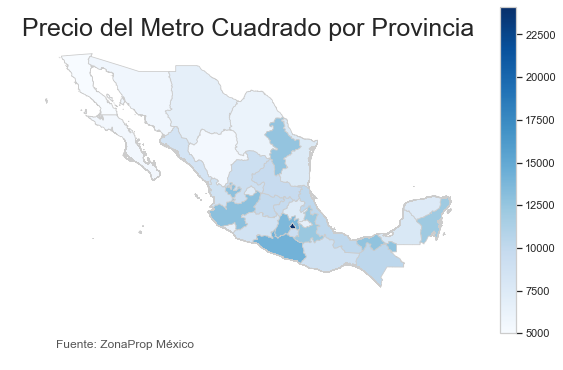

In [101]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'precioXmetro'
# set the range for the choropleth
vmin, vmax = 5000, 24100
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged2.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Precio del Metro Cuadrado por Provincia', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Fuente: ZonaProp México',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

fig.savefig('map_preciodelm2_por_provincia.png', dpi=300)
            